In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import os
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Crash severity/Crash_Analysis_System__CAS__Data.csv')

In [5]:
pd.set_option('max_column' ,None)

In [6]:
data

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1876166.0,5820081.0,1,NaN,537601.0,0.0,NaN,0.0,0.0,NaN,South,2007,PARALLEL ACCESS,CHADWICK ROAD,NaN,Serious Crash,No,2007,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,1175000.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,Bay of Plenty Region,Nil,2-way,Sealed,NaN,0.0,1.0,NaN,50.0,NaN,Null,1.0,0.0,NaN,23.0,Tauranga City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,1885155.0,5773191.0,2,NaN,540600.0,0.0,NaN,0.0,2.0,NaN,Null,2008,TI ST,FENTON ST,NaN,Non-Injury Crash,No,2007,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,1243100.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Bay of Plenty Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,None,0.0,0.0,NaN,24.0,Rotorua District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1739772.0,5981206.0,3,NaN,506660.0,0.0,0.0,0.0,1.0,1.0,South,2017,WAYBY VALLEY ROAD,WILSON ROAD,NaN,Non-Injury Crash,No,2016,0.0,South,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Bright sun,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,Null,0.0,0.0,NaN,76.0,Auckland,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
3,1747263.0,5921208.0,4,NaN,512300.0,0.0,NaN,0.0,2.0,NaN,Null,2013,TE ATATU ROAD,GUNNER DRIVE,NaN,Non-Injury Crash,No,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,250101.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,1757799.0,5920490.0,5,NaN,514103.0,0.0,NaN,0.0,1.0,NaN,Null,2004,PRINCES ST,WATERLOO QUADRANT,NaN,Minor Crash,No,2004,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,437300.0,1.0,0.0,1.0,6.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Off,0.0,1.0,NaN,76.0,Auckland,Traffic Signals,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731477,1762813.0,5436926.0,731478,NaN,568303.0,0.0,NaN,0.0,2.0,NaN,Null,2010,NAENAE ROAD,CLENDON ST,NaN,Non-Injury Crash,No,2009,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,1953600.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Wellington Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,46.0,Lower Hutt City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
731478,1366548.0,4893749.0,731479,NaN,606700.0,0.0,0.0,0.0,0.0,0.0,North,2010,CIRCLE HILL ROAD,JENSEN ROAD,NaN,Minor Crash,No,2010,0.0,South,1.0,0.0,0.0,Hill Road,0.0,NaN,0.0,NaN,0.0,Overcast,2986300.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Otago Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,Null,1.0,0.0,NaN,72.0,Clutha District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
731479,1748998.0,5428685.0,731480,NaN,572900.0,0.0,NaN,0.0,2.0,NaN,Null,2006,FEATHERSTON ST,BUNNY ST,NaN,Non-Injury Crash,No,

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731482 entries, 0 to 731481
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          731482 non-null  float64
 1   Y                          731482 non-null  float64
 2   OBJECTID                   731482 non-null  int64  
 3   advisorySpeed              26869 non-null   float64
 4   areaUnitID                 731373 non-null  float64
 5   bicycle                    731477 non-null  float64
 6   bridge                     288224 non-null  float64
 7   bus                        731477 non-null  float64
 8   carStationWagon            731477 non-null  float64
 9   cliffBank                  288224 non-null  float64
 10  crashDirectionDescription  731482 non-null  object 
 11  crashFinancialYear         731482 non-null  int64  
 12  crashLocation1             731482 non-null  object 
 13  crashLocation2             73

In [8]:
pd.set_option('max_row' ,None)

In [9]:
data.isna().mean()

X                            0.000000
Y                            0.000000
OBJECTID                     0.000000
advisorySpeed                0.963268
areaUnitID                   0.000149
bicycle                      0.000007
bridge                       0.605973
bus                          0.000007
carStationWagon              0.000007
cliffBank                    0.605973
crashDirectionDescription    0.000000
crashFinancialYear           0.000000
crashLocation1               0.000000
crashLocation2               0.000757
crashRoadSideRoad            1.000000
crashSeverity                0.000000
crashSHDescription           0.000133
crashYear                    0.000000
debris                       0.605973
directionRoleDescription     0.000113
ditch                        0.605973
fatalCount                   0.000186
fence                        0.605973
flatHill                     0.000000
guardRail                    0.605973
holiday                      0.945744
houseOrBuild

In [10]:
null_columns = ['advisorySpeed', 'bridge', 'cliffBank', 'crashRoadSideRoad', 'debris',
               'ditch','fence','guardRail','holiday','houseOrBuilding','intersection',
               'kerb','objectThrownOrDropped','otherObject','overBank','parkedVehicle',
               'pedestrian','phoneBoxEtc','postOrPole','roadworks','slipOrFlood','strayAnimal',
                'temporarySpeedLimit','trafficIsland','trafficSign','train','tree','vehicle',
               'waterRiver']

data = data.drop(null_columns, axis=1)

In [11]:
data.isna().sum()

X                               0
Y                               0
OBJECTID                        0
areaUnitID                    109
bicycle                         5
bus                             5
carStationWagon                 5
crashDirectionDescription       0
crashFinancialYear              0
crashLocation1                  0
crashLocation2                554
crashSeverity                   0
crashSHDescription             97
crashYear                       0
directionRoleDescription       83
fatalCount                    136
flatHill                        0
light                           0
meshblockId                   109
minorInjuryCount              136
moped                           5
motorcycle                      5
NumberOfLanes                1211
otherVehicleType                5
region                        109
roadCharacter                   0
roadLane                        0
roadSurface                     0
schoolBus                       5
seriousInjuryC

In [12]:
data = data.dropna(axis=0).reset_index(drop=True)

In [13]:
#data

In [14]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [15]:
data.head()

,X,Y,OBJECTID,areaUnitID,bicycle,bus,carStationWagon,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,region,roadCharacter,roadLane,roadSurface,schoolBus,seriousInjuryCount,speedLimit,streetLight,suv,taxi,tlaId,tlaName,trafficControl,truck,unknownVehicleType,urban,vanOrUtility,weatherA,weatherB
0,1876166.0,5820081.0,1,537601.0,0.0,0.0,0.0,South,2007,PARALLEL ACCESS,CHADWICK ROAD,Serious Crash,No,2007,South,0.0,Flat,Overcast,1175000.0,0.0,0.0,0.0,2.0,0.0,Bay of Plenty Region,Nil,2-way,Sealed,0.0,1.0,50.0,Null,1.0,0.0,23.0,Tauranga City,Unknown,0.0,0.0,Urban,0.0,Fine,Null
1,1885155.0,5773191.0,2,540600.0,0.0,0.0,2.0,Null,2008,TI ST,FENTON ST,Non-Injury Crash,No,2007,West,0.0,Flat,Bright sun,1243100.0,0.0,0.0,0.0,2.0,0.0,Bay of Plenty Region,Nil,2-way,Sealed,0.0,0.0,50.0,None,0.0,0.0,24.0,Rotorua District,Give way,0.0,0.0,Urban,0.0,Fine,Null
2,1739772.0,5981206.0,3,506660.0,0.0,0.0,1.0,South,2017,WAYBY VALLEY ROAD,WILSON ROAD,Non-Injury Crash,No,2016,South,0.0,Flat,Bright sun,136700.0,0.0,0.0,0.0,2.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,100.0,Null,0.0,0.0,76.0,Auckland,Unknown,0.0,0.0,Open,0.0,Fine,Null
3,1747263.0,5921208.0,4,512300.0,0.0,0.0,2.0,Null,2013,TE ATATU ROAD,GUNNER DRIVE,Non-Injury Crash,No,2012,South,0.0,Flat,Overcast,250101.0,0.0,0.0,0.0,2.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,50.0,Off,0.0,0.0,76.0,Auckland,Give way,0.0,0.0,Urban,0.0,Light rain,Null
4,1757799.0,5920490.0,5,514103.0,0.0,0.0,1.0,Null,2004,PRINCES ST,WATERLOO QUADRANT,Minor Crash,No,2004,South,0.0,Flat,Bright sun,437300.0,1.0,0.0,1.0,6.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,50.0,Off,0.0,1.0,76.0,Auckland,Traffic Signals,0.0,0.0,Urban,0.0,Fine,Null


In [16]:
data.crashSeverity.value_counts(normalize=True)

Non-Injury Crash    0.710069
Minor Crash         0.225405
Serious Crash       0.055431
Fatal Crash         0.009095
Name: crashSeverity, dtype: float64

In [17]:
encoding = {
"crashSeverity": {"Fatal Crash": 1, "Serious Crash": 2, "Minor Crash": 3,  "Non-Injury Crash": 4}
}
data.replace(encoding, inplace=True)
print(data['crashSeverity'].value_counts())

4    517703
3    164340
2     40414
1      6631
Name: crashSeverity, dtype: int64


In [18]:
print('The dataset has {:3,d} samples and {} features'.format(*data.shape))

The dataset has 729,088 samples and 43 features


In [19]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'crashDirectionDescription': 5,
 'crashLocation1': 34702,
 'crashLocation2': 48605,
 'crashSHDescription': 3,
 'directionRoleDescription': 5,
 'flatHill': 3,
 'light': 5,
 'region': 16,
 'roadCharacter': 9,
 'roadLane': 4,
 'roadSurface': 4,
 'streetLight': 4,
 'tlaName': 67,
 'trafficControl': 8,
 'urban': 2,
 'weatherA': 7,
 'weatherB': 4}

In [20]:
unneeded_columns = ['crashLocation1', 'crashLocation2','tlaName','areaUnitID','OBJECTID','X','Y','crashFinancialYear','crashYear',
                    'meshblockId','tlaId']

data = data.drop(unneeded_columns, axis=1)

In [21]:
#data

In [22]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [23]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'crashDirectionDescription': 5,
 'crashSHDescription': 3,
 'directionRoleDescription': 5,
 'flatHill': 3,
 'light': 5,
 'region': 16,
 'roadCharacter': 9,
 'roadLane': 4,
 'roadSurface': 4,
 'streetLight': 4,
 'trafficControl': 8,
 'urban': 2,
 'weatherA': 7,
 'weatherB': 4}

In [24]:
data = onehot_encode(
    data,
    columns=['crashDirectionDescription', 'crashSHDescription', 'directionRoleDescription', 'flatHill',
             'light', 'region', 'roadCharacter','roadLane','roadSurface','streetLight','trafficControl',
            'weatherA','weatherB'],
    prefixes=['CDD', 'CSD', 'DRD', 'FH', 'L', 'R', 'RC','RL','RS','SL','TC','WA','WB']
)

In [25]:
#data

In [26]:
data.head()

,bicycle,bus,carStationWagon,crashSeverity,fatalCount,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,schoolBus,seriousInjuryCount,speedLimit,suv,taxi,truck,unknownVehicleType,urban,vanOrUtility,CDD_East,CDD_North,CDD_Null,CDD_South,CDD_West,CSD_No,CSD_Unknown,CSD_Yes,DRD_East,DRD_North,DRD_Null,DRD_South,DRD_West,FH_Flat,FH_Hill Road,FH_Null,L_Bright sun,L_Dark,L_Overcast,L_Twilight,L_Unknown,R_Auckland Region,R_Bay of Plenty Region,R_Canterbury Region,R_Gisborne Region,R_Hawke's Bay Region,R_Manawatu-Wanganui Region,R_Marlborough Region,R_Nelson Region,R_Northland Region,R_Otago Region,R_Southland Region,R_Taranaki Region,R_Tasman Region,R_Waikato Region,R_Wellington Region,R_West Coast Region,RC_Bridge,RC_Motorway ramp,RC_Nil,RC_Overpass,RC_Rail xing,RC_Speed hump,RC_Tram lines,RC_Tunnel,RC_Underpass,RL_1-way,RL_2-way,RL_Null,RL_Off road,RS_End of seal,RS_Null,RS_Sealed,RS_Unsealed,SL_None,SL_Null,SL_Off,SL_On,TC_Give way,TC_Isolated Pedestrian signal (non-intersection),TC_Nil,TC_Pointsman,TC_School Patrol/warden,TC_Stop,TC_Traffic Signals,TC_Unknown,WA_Fine,WA_Hail or Sleet,WA_Heavy rain,WA_Light rain,WA_Mist or Fog,WA_Null,WA_Snow,WB_Frost,WB_None,WB_Null,WB_Strong wind
0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,0.0,Urban,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,2.0,4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,Urban,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,1.0,4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,Open,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,2.0,4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,Urban,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,0.0,1.0,3,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,Urban,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [27]:
def get_binary_column(df, column):
    if column == 'urban':
        return df[column].apply(lambda x: 1 if x == 'Urban' else 0)
    else:
        return df[column].apply(lambda x: 1 if x == 'Open' else 0)

In [28]:
data['urban'] = get_binary_column(data, 'urban')
data['NumberOfLanes'] = get_binary_column(data, 'NumberOfLanes')
data['speedLimit'] = get_binary_column(data, 'speedLimit')
data['carStationWagon'] = get_binary_column(data, 'carStationWagon')

In [29]:
#data

In [30]:
data.head()

,bicycle,bus,carStationWagon,crashSeverity,fatalCount,minorInjuryCount,moped,motorcycle,NumberOfLanes,otherVehicleType,schoolBus,seriousInjuryCount,speedLimit,suv,taxi,truck,unknownVehicleType,urban,vanOrUtility,CDD_East,CDD_North,CDD_Null,CDD_South,CDD_West,CSD_No,CSD_Unknown,CSD_Yes,DRD_East,DRD_North,DRD_Null,DRD_South,DRD_West,FH_Flat,FH_Hill Road,FH_Null,L_Bright sun,L_Dark,L_Overcast,L_Twilight,L_Unknown,R_Auckland Region,R_Bay of Plenty Region,R_Canterbury Region,R_Gisborne Region,R_Hawke's Bay Region,R_Manawatu-Wanganui Region,R_Marlborough Region,R_Nelson Region,R_Northland Region,R_Otago Region,R_Southland Region,R_Taranaki Region,R_Tasman Region,R_Waikato Region,R_Wellington Region,R_West Coast Region,RC_Bridge,RC_Motorway ramp,RC_Nil,RC_Overpass,RC_Rail xing,RC_Speed hump,RC_Tram lines,RC_Tunnel,RC_Underpass,RL_1-way,RL_2-way,RL_Null,RL_Off road,RS_End of seal,RS_Null,RS_Sealed,RS_Unsealed,SL_None,SL_Null,SL_Off,SL_On,TC_Give way,TC_Isolated Pedestrian signal (non-intersection),TC_Nil,TC_Pointsman,TC_School Patrol/warden,TC_Stop,TC_Traffic Signals,TC_Unknown,WA_Fine,WA_Hail or Sleet,WA_Heavy rain,WA_Light rain,WA_Mist or Fog,WA_Null,WA_Snow,WB_Frost,WB_None,WB_Null,WB_Strong wind
0,0.0,0.0,0,2,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0,1,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0,4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0,4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0,4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.0,0.0,0,3,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [31]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [32]:
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35064

In [33]:
X = data[data.columns.drop('crashSeverity')].values
y = data['crashSeverity'].values

y = y.reshape(-1, 1)

In [34]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [35]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [37]:
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])

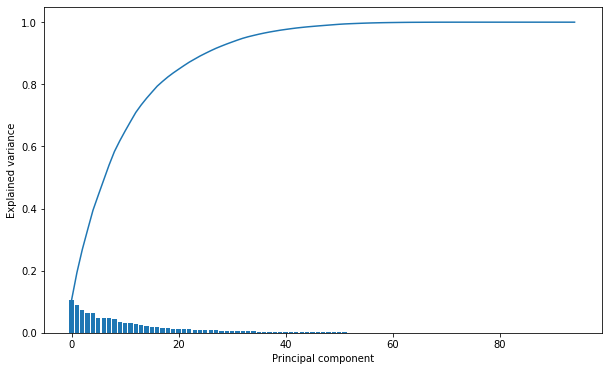

In [38]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [39]:
pca = PCA(n_components=0.80)
pca.fit(X_norm[:train_end_idx])
X_pca = pca.transform(X_norm)

In [40]:
X_pca.shape

(729088, 18)

In [41]:
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 0

In [42]:
X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=True)

In [43]:
X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=True)

In [44]:
X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history, 
                                   future_target, step=1, single_step=True)

In [45]:
batch_size = 32
buffer_size = 1000

In [46]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [47]:
# Define some common parameters

input_shape = X_train.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [48]:
y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)

In [49]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

#XGBOOST

In [50]:
X_train_xgb = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_xgb = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_xgb = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])

In [51]:
param = {'eta': 0.03, 'max_depth': 180, 
         'subsample': 1.0, 'colsample_bytree': 0.95, 
         'alpha': 0.1, 'lambda': 0.15, 'gamma': 0.1,
         'objective': 'reg:linear', 'eval_metric': 'rmse', 
         'silent': 1, 'min_child_weight': 0.1, 'n_jobs': -1}

dtrain = xgb.DMatrix(X_train_xgb, y_train)
dval = xgb.DMatrix(X_val_xgb, y_val)
dtest = xgb.DMatrix(X_test_xgb, y_test)
eval_list = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(param, dtrain, 180, eval_list, early_stopping_rounds=3)

[0]	train-rmse:0.420283	eval-rmse:0.424923
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 3 rounds.
[1]	train-rmse:0.408386	eval-rmse:0.415651
[2]	train-rmse:0.396806	eval-rmse:0.406908
[3]	train-rmse:0.385582	eval-rmse:0.398364
[4]	train-rmse:0.374703	eval-rmse:0.390177
[5]	train-rmse:0.364146	eval-rmse:0.382251
[6]	train-rmse:0.353902	eval-rmse:0.374672
[7]	train-rmse:0.343978	eval-rmse:0.367401
[8]	train-rmse:0.334369	eval-rmse:0.360548
[9]	train-rmse:0.325065	eval-rmse:0.35384
[10]	train-rmse:0.316069	eval-rmse:0.347312
[11]	train-rmse:0.307337	eval-rmse:0.34104
[12]	train-rmse:0.298903	eval-rmse:0.335122
[13]	train-rmse:0.290708	eval-rmse:0.329489
[14]	train-rmse:0.282786	eval-rmse:0.324099
[15]	train-rmse:0.275097	eval-rmse:0.318791
[16]	train-rmse:0.267642	eval-rmse:0.313777
[17]	train-rmse:0.260438	eval-rmse:0.308857
[18]	train-rmse:0.253443	eval-rmse:0.30427
[19]	train-rmse:0.246699	eval-rmse:

In [52]:
forecast = xgb_model.predict(dtest)
xgb_forecast = forecast.reshape(-1, 1)

xgb_forecast_inv = scaler_y.inverse_transform(xgb_forecast)

rmse_xgb = sqrt(mean_squared_error(y_test_inv, xgb_forecast_inv))
print('RMSE of Crash Severity XGBoost Prediction: {}'
      .format(round(rmse_xgb, 3)))

RMSE of Crash Severity XGBoost Prediction: 0.643


#LSTM


In [53]:
tf.keras.backend.clear_session()

multivariate_lstm = tf.keras.models.Sequential([
    LSTM(100, input_shape=input_shape, 
         return_sequences=True),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_lstm.h5', monitor=('val_loss'), save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=6e-3, amsgrad=True)

multivariate_lstm.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [54]:
history = multivariate_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

Epoch 1/120
845/845 [==============================] - 34s 5ms/step - loss: 0.2869 - root_mean_squared_error: 0.4565 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 2/120
845/845 [==============================] - 3s 4ms/step - loss: 0.0519 - root_mean_squared_error: 0.2278 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 3/120
845/845 [==============================] - 3s 4ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2114
Epoch 4/120
845/845 [==============================] - 3s 4ms/step - loss: 0.0465 - root_mean_squared_error: 0.2157 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2117
Epoch 5/120
845/845 [==============================] - 3s 4ms/step - loss: 0.0452 - root_mean_squared_error: 0.2127 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 6/120
845/845 [==============================] - 3s 4ms/step - loss: 0.0445 - root_mean_squared_error: 0.2110 - val_loss: 0.0449

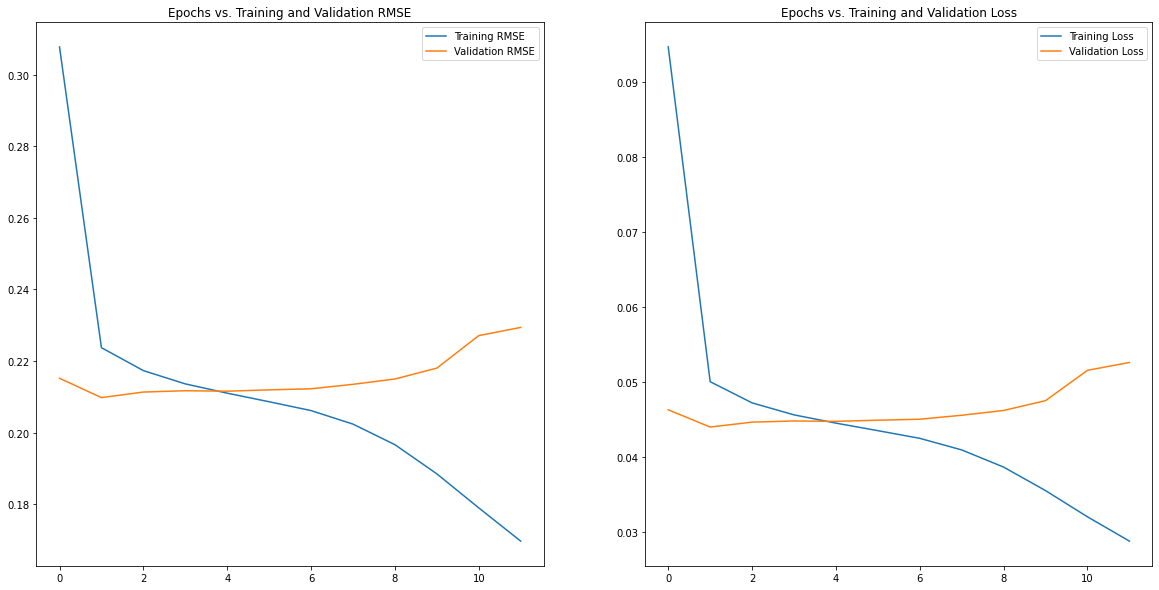

In [55]:
plot_model_rmse_and_loss(history)

In [56]:
multivariate_lstm = tf.keras.models.load_model('multivariate_lstm.h5')

forecast = multivariate_lstm.predict(X_test)
lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_lstm = sqrt(mean_squared_error(y_test_inv,
                                    lstm_forecast))
print('RMSE of  Crash Severity Prediction LSTM Prediction: {}'
      .format(round(rmse_lstm, 3)))

RMSE of  Crash Severity Prediction LSTM Prediction: 0.641


#CNN

In [57]:
tf.keras.backend.clear_session()

multivariate_cnn = tf.keras.models.Sequential([
    Conv1D(filters=48, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_cnn.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=6e-3, amsgrad=True)

multivariate_cnn.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [58]:
history = multivariate_cnn.fit(train, epochs=120,
                               validation_data=validation,
                               callbacks=[early_stopping, 
                                          model_checkpoint])

Epoch 1/120
845/845 [==============================] - 3s 3ms/step - loss: 0.2440 - root_mean_squared_error: 0.3350 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2109
Epoch 2/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0474 - root_mean_squared_error: 0.2178 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197
Epoch 3/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0467 - root_mean_squared_error: 0.2160 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 4/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0456 - root_mean_squared_error: 0.2135 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2123
Epoch 5/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0451 - root_mean_squared_error: 0.2123 - val_loss: 0.0467 - val_root_mean_squared_error: 0.2161
Epoch 6/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0446 - root_mean_squared_error: 0.2112 - val_loss: 0.0499 

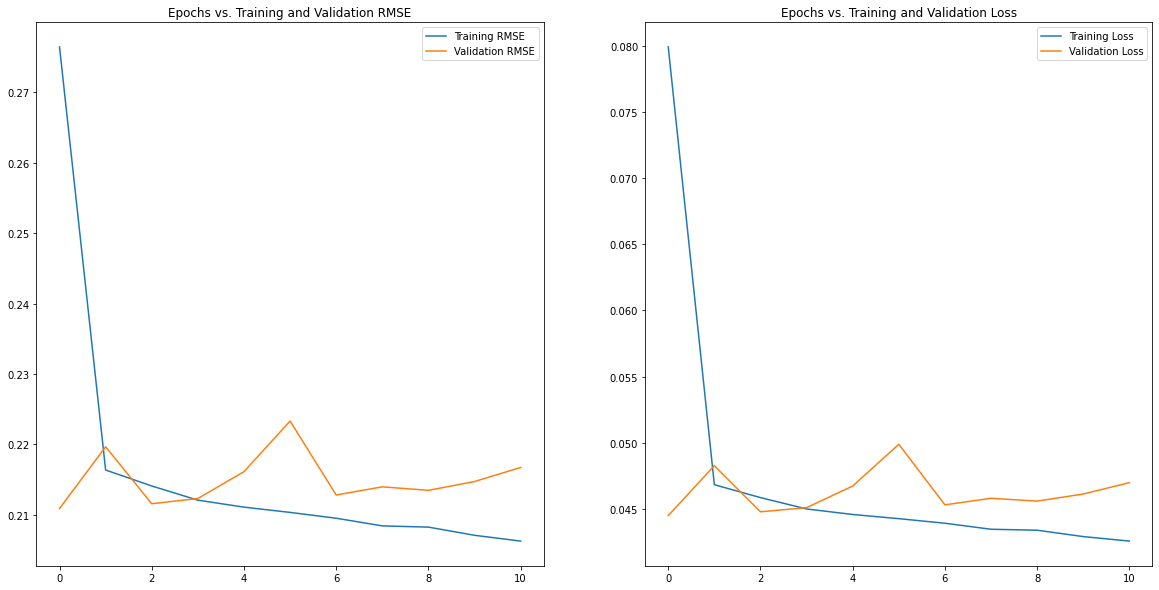

In [59]:
plot_model_rmse_and_loss(history)

In [60]:
multivariate_cnn = tf.keras.models.load_model('multivariate_cnn.h5')

forecast = multivariate_cnn.predict(X_test)
multivariate_cnn_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_cnn = sqrt(mean_squared_error(y_test_inv,
                                        multivariate_cnn_forecast))
print('RMSE of Crash Severity multivariate CNN prediction: {}'
      .format(round(rmse_mult_cnn, 3)))

RMSE of Crash Severity multivariate CNN prediction: 0.642


# CNN-LSTM

In [61]:
tf.keras.backend.clear_session()

multivariate_cnn_lstm = tf.keras.models.Sequential([
    Conv1D(filters=100, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape),
    LSTM(100, return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_cnn_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=4e-3, amsgrad=True)

multivariate_cnn_lstm.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [62]:
history = multivariate_cnn_lstm.fit(train, epochs=120,
                                    validation_data=validation,
                                    callbacks=[early_stopping, 
                                               model_checkpoint])

Epoch 1/120
845/845 [==============================] - 5s 5ms/step - loss: 0.0990 - root_mean_squared_error: 0.2557 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2231
Epoch 2/120
845/845 [==============================] - 4s 4ms/step - loss: 0.0471 - root_mean_squared_error: 0.2171 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2087
Epoch 3/120
845/845 [==============================] - 4s 4ms/step - loss: 0.0460 - root_mean_squared_error: 0.2144 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105
Epoch 4/120
845/845 [==============================] - 4s 4ms/step - loss: 0.0452 - root_mean_squared_error: 0.2127 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2104
Epoch 5/120
845/845 [==============================] - 4s 4ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105
Epoch 6/120
845/845 [==============================] - 4s 4ms/step - loss: 0.0446 - root_mean_squared_error: 0.2112 - val_loss: 0.0459 

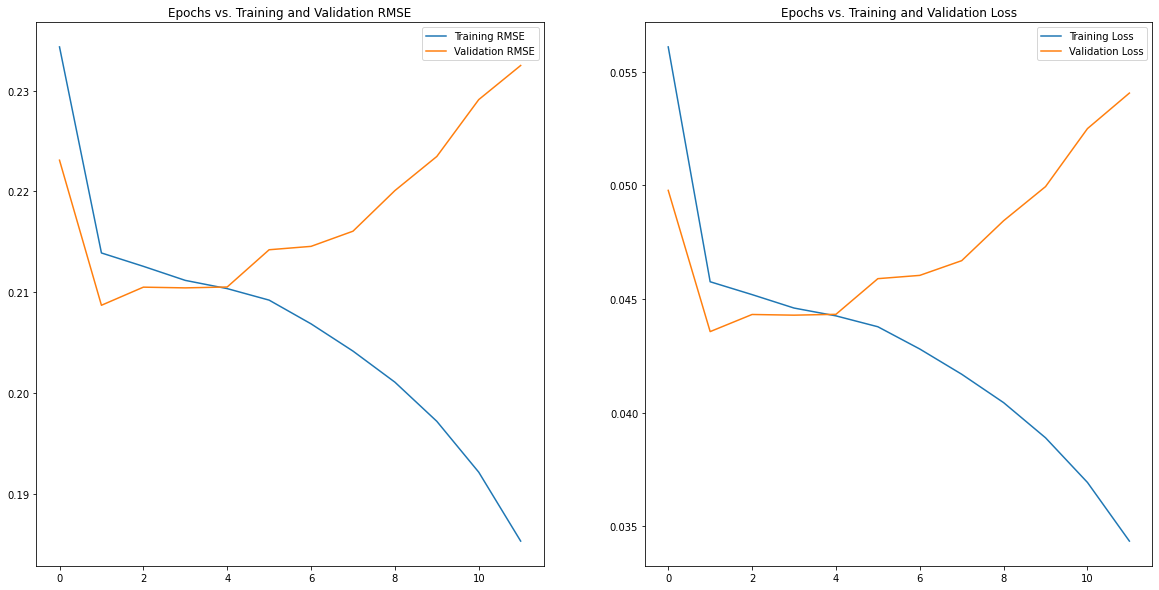

In [63]:
plot_model_rmse_and_loss(history)

In [64]:
multivariate_cnn_lstm = tf.keras.models.load_model('multivariate_cnn_lstm.h5')

forecast = multivariate_cnn_lstm.predict(X_test)
multivariate_cnn_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_cnn_lstm = sqrt(mean_squared_error(y_test_inv, 
                                             multivariate_cnn_lstm_forecast))
print('RMSE of Crash Severity multivariate CNN-`LSTM prediction: {}'
      .format(round(rmse_mult_cnn_lstm, 3)))

RMSE of Crash Severity multivariate CNN-`LSTM prediction: 0.635


In [65]:
X_test.shape

(3984, 24, 19)

#Time Distributed MLP

In [66]:
tf.keras.backend.clear_session()

multivariate_mlp = tf.keras.models.Sequential([
    TimeDistributed(Dense(200, activation='relu'),
                    input_shape=input_shape),
    TimeDistributed(Dense(150, activation='relu')),
    TimeDistributed(Dense(100, activation='relu')),
    TimeDistributed(Dense(50, activation='relu')),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_mlp.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=2e-3, amsgrad=True)

multivariate_mlp.compile(loss=loss,
                          optimizer=optimizer,
                          metrics=metric)

In [67]:
history = multivariate_mlp.fit(train, epochs=120,
                               validation_data=validation,
                               callbacks=[early_stopping, 
                                          model_checkpoint])

Epoch 1/120
845/845 [==============================] - 3s 3ms/step - loss: 0.0795 - root_mean_squared_error: 0.2495 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 2/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0486 - root_mean_squared_error: 0.2203 - val_loss: 0.0441 - val_root_mean_squared_error: 0.2100
Epoch 3/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0465 - root_mean_squared_error: 0.2157 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2106
Epoch 4/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0466 - root_mean_squared_error: 0.2158 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2106
Epoch 5/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0460 - root_mean_squared_error: 0.2144 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2117
Epoch 6/120
845/845 [==============================] - 2s 3ms/step - loss: 0.0451 - root_mean_squared_error: 0.2122 - val_loss: 0.0449 

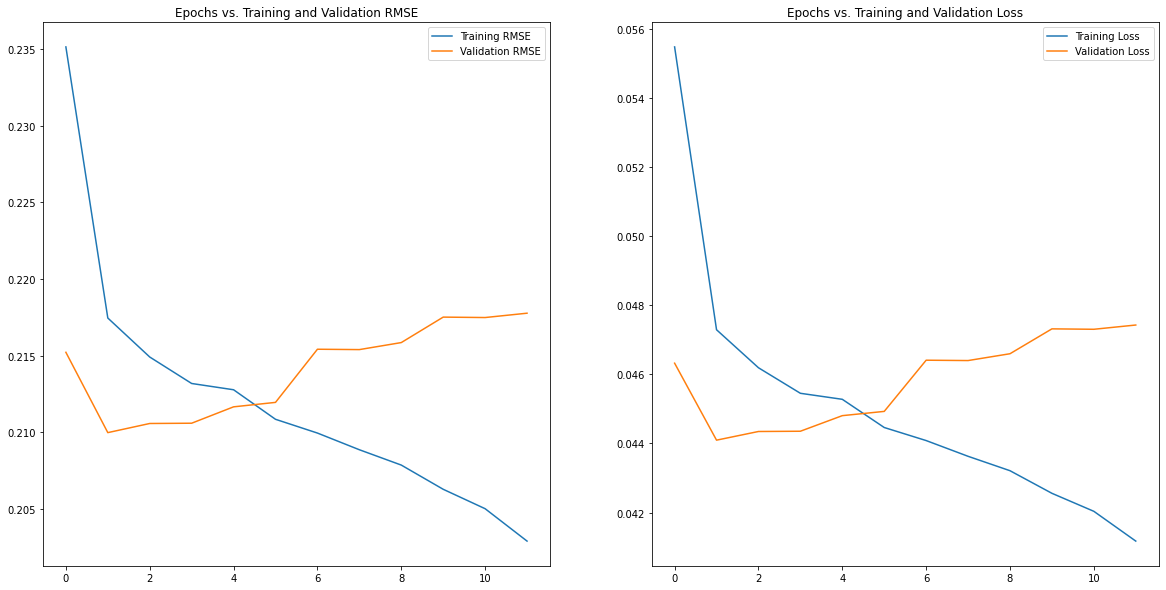

In [68]:
plot_model_rmse_and_loss(history)

In [69]:
multivariate_mlp = tf.keras.models.load_model('multivariate_mlp.h5')

forecast = multivariate_mlp.predict(X_test)
multivariate_mlp_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_mlp = sqrt(mean_squared_error(y_test_inv,
                                        multivariate_mlp_forecast))
print('RMSE of Crash Severity multivariate MLP prediction: {}'
      .format(round(rmse_mult_mlp, 3)))

RMSE of Crash Severity multivariate MLP prediction: 0.638


#Encoder-Decoder

In [70]:
tf.keras.backend.clear_session()

encoder_decoder = tf.keras.models.Sequential([
    LSTM(50, activation='relu', input_shape=input_shape),
    RepeatVector(past_history),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(50, activation='relu')),
    Flatten(),
    Dense(25, activation='relu'),
    Dense(1)
])



model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'encoder_decoder.h5', save_best_only=True)

optimizer = tf.keras.optimizers.Adam(lr=1e-3, amsgrad=True)

encoder_decoder.compile(loss=loss,
                    optimizer=optimizer,
                    metrics=metric)

In [71]:
history = encoder_decoder.fit(train, epochs=50,
                              validation_data=validation,
                              callbacks=[early_stopping, 
                                         model_checkpoint])

Epoch 1/50
845/845 [==============================] - 55s 63ms/step - loss: 0.0735 - root_mean_squared_error: 0.2378 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2108
Epoch 2/50
845/845 [==============================] - 53s 63ms/step - loss: 0.0462 - root_mean_squared_error: 0.2149 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2086
Epoch 3/50
845/845 [==============================] - 53s 63ms/step - loss: 0.0462 - root_mean_squared_error: 0.2149 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2088
Epoch 4/50
845/845 [==============================] - 53s 63ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2099
Epoch 5/50
845/845 [==============================] - 53s 63ms/step - loss: 0.0455 - root_mean_squared_error: 0.2133 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2090
Epoch 6/50
845/845 [==============================] - 53s 63ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0

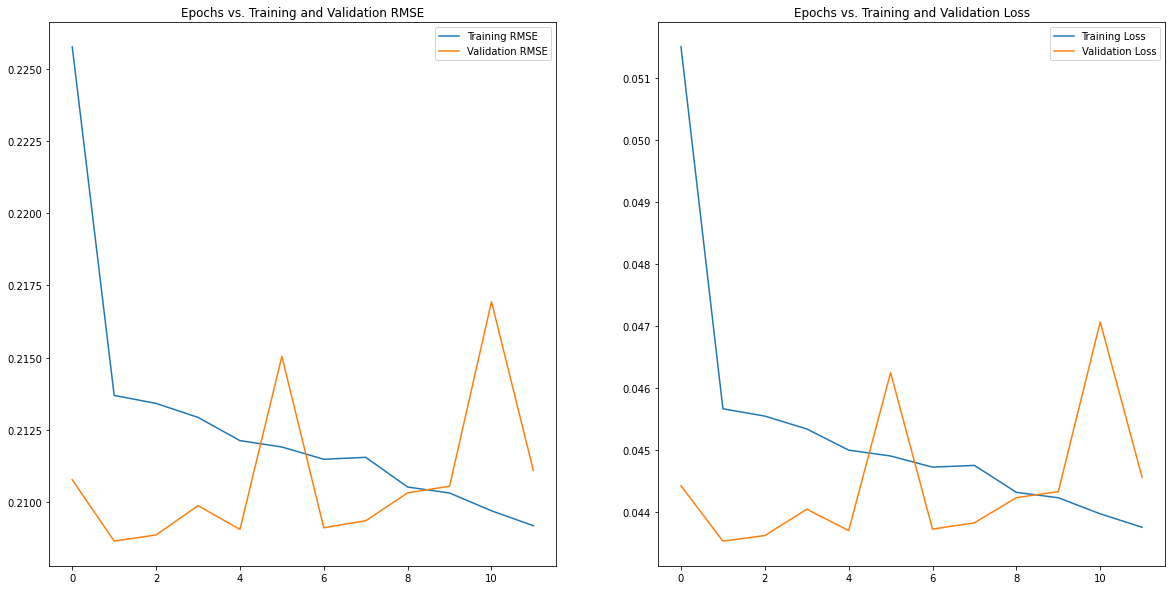

In [72]:
plot_model_rmse_and_loss(history)

In [73]:
encoder_decoder = tf.keras.models.load_model('encoder_decoder.h5')

forecast = encoder_decoder.predict(X_test)
encoder_decoder_forecast = scaler_y.inverse_transform(forecast)

rmse_encoder_decoder = sqrt(mean_squared_error(y_test_inv, 
                                               encoder_decoder_forecast))
print('RMSE of Crash Severity Encoder-Decoder Prediction: {}'
      .format(round(rmse_encoder_decoder, 3)))

RMSE of Crash Severity Encoder-Decoder Prediction: 0.636
